# Исследование рынка общественного питания в Москве

Партнеры стартапа обратились к инвесторам с предложением об открытии сети кафе с новой моделью обслуживания в Москве. Перед тем, как обсуждать инвестиции, необходимо исследовать московский рынок общественного питания и подготовить презентацию с рекомендациями по поводу развития проекта. 

**Цель:**

- Исследование рынка общественного питания в Москве;
- Создание презентации с рекомендациями по поводу развития проекта;

**Задачи:**

- Загрузка данных и подготовка их к анализу;
- Объединение данных по точкам общепита и информации о районах Москвы;
- Анализ данных (изучние видов заведений общепита, их принаджлежности к сетям, распределение посадочных мест по заведениям, географическое расположение заведений, проникновение заведений в различные районы города;
- Формулировка общего вывода и рекомендаций о виде заведений, количестве посадочных мест, а также районе расположения. Комметарии по поводу возможности развития сети;
- Подготовка презентации исследования для инвесторов в формате pdf;

**Описание данных:**

Файл /datasets/rest_data.csv:

    id — идентификатор объекта;
    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест.

Файл /data-4275-2022-09-06_cafe.xlsx (источник данных - https://data.mos.ru/):

    ID - Код;
    Name - Наименование;
    global_id - Идентификатор;
    IsNetObject - Является сетевым заведением;
    OperatingCompany - Название управляющей компании;
    TypeObject - Вид объекта;
    AdmArea - Административный округ по адресу;
    District - Район;
    Address - Адрес;
    PublicPhone - Контактный телефон;
    SeatsCount - Число посадочных мест;
    SocialPrivileges - Показатель социальных льгот;
    Longitude_WGS84 - Долгота в WGS-84;
    Latitude_WGS84 - Широта в WGS-84;

<a id="preprocessing"> </a>
## Загрузка и подготовка данных к анализу 

In [269]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [270]:
try:
    data = pd.read_csv('/datasets/rest_data.csv')

except:
    data = pd.read_csv('rest_data.csv')

In [271]:
def check(data):
    data.info()
    display(data.head(5))
    print('Количество пропусков:', data.isnull().sum())
    print('Количество дубликатов:', data.duplicated().sum())

In [272]:
check(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Количество пропусков: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Количество дубликатов: 0


In [273]:
len(data['chain'].unique())

2

In [274]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [275]:
len(data['object_name'].unique())

10393

In [276]:
data['object_name'] = data['object_name'].str.lower()

In [277]:
data['object_name'] = data['object_name'].str.title()

In [278]:
len(data['object_name'].unique())

9924

In [279]:
data['object_name'] = data['object_name'].str.replace(',', '', regex=False)
data['object_name'] = data['object_name'].str.replace('.', '', regex=False)

In [280]:
len(data['object_name'].unique())

9913

In [281]:
data['chain'] = data['chain'] == 'да'

In [282]:
data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая Метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [283]:
del data['id']

In [284]:
data.duplicated().sum()

85

In [285]:
data = data.drop_duplicates().reset_index()

In [286]:
data = data.reset_index(drop=True)

In [287]:
data = data.rename(columns={'index': 'id'})
data.head()

,id,object_name,chain,object_type,address,number
0,0,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,1,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,2,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,3,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,4,Кафе «Вишневая Метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Результат загрузки и изучения данных:
- Пропусков;
- Устранили разницу в написании названий объектов, из-за чего снизили количество уникальных (привели к одному регистру символы, убрали точки и запятые из названий);
- Принадлежность к сетям перевели в булевы значения;
- После удаления столбца с id обнаружили 85 дублей, удалили их.


Импортируем данные о заведениях общепита Москвы, где содержится информация о районах, где расположены кафе и рестораны.

In [288]:
from io import BytesIO
import requests
spreadsheet_id = '1sKkP9PAmlWbcw7bZMvCNlrXnu6iGMEbWv-Kn53Qfz_o'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_moscow = pd.read_csv(BytesIO(r.content))
data_moscow = data_moscow.rename(
    columns={'Address':'address',
             'ID':'id',
             'Name':'name',
             'IsNetObject':'is_net_object',
             'OperatingCompany':'operating_company',
             'TypeObject':'type_object',
             'AdmArea':'adm_area',
             'District':'district',
             'PublicPhone':'public_phone',
             'SeatsCount':'seats_count',
             'SocialPrivileges':'social_privileges',
             'Longitude_WGS84':'longitude_WGS84',
             'Latitude_WGS84':'latitude_WGS84'
            }
)
data_moscow.head(5)

,id,name,global_id,is_net_object,operating_company,type_object,adm_area,district,address,public_phone,seats_count,social_privileges,longitude_WGS84,latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN


In [289]:
data_moscow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19733 entries, 0 to 19732
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 19733 non-null  object
 1   name               19733 non-null  object
 2   global_id          19733 non-null  object
 3   is_net_object      19733 non-null  object
 4   operating_company  3585 non-null   object
 5   type_object        19733 non-null  object
 6   adm_area           19733 non-null  object
 7   district           19733 non-null  object
 8   address            19733 non-null  object
 9   public_phone       18782 non-null  object
 10  seats_count        19733 non-null  object
 11  social_privileges  19733 non-null  object
 12  longitude_WGS84    19733 non-null  object
 13  latitude_WGS84     19733 non-null  object
 14  geodata_center     1004 non-null   object
 15  geoarea            1 non-null      object
dtypes: object(16)
memory usage: 2.4+ MB


Интересующие нас данные (адреса, названия заведений и районы) присутствуют в полной мере, без пропусков.

## Анализ данных

Посмотрим распределение заведений по типам объектов общественного питания.

In [290]:
object_type_df = (
    data.groupby('object_type', as_index=False)
    .agg({'id': 'count'})
    .sort_values(by='id', ascending=False)
)
object_type_df.columns = ['Тип объекта общественного питания', 'Количество']


In [291]:
object_type_df['ratio'] = (object_type_df['Количество'] / object_type_df['Количество'].sum())*100
object_type_df

,Тип объекта общественного питания,Количество,ratio
3,кафе,6071,39.729075
8,столовая,2584,16.909888
7,ресторан,2282,14.933578
6,предприятие быстрого обслуживания,1897,12.414109
0,бар,855,5.595184
1,буфет,576,3.769387
4,кафетерий,395,2.584909
2,закусочная,348,2.277338
5,магазин (отдел кулинарии),273,1.786532


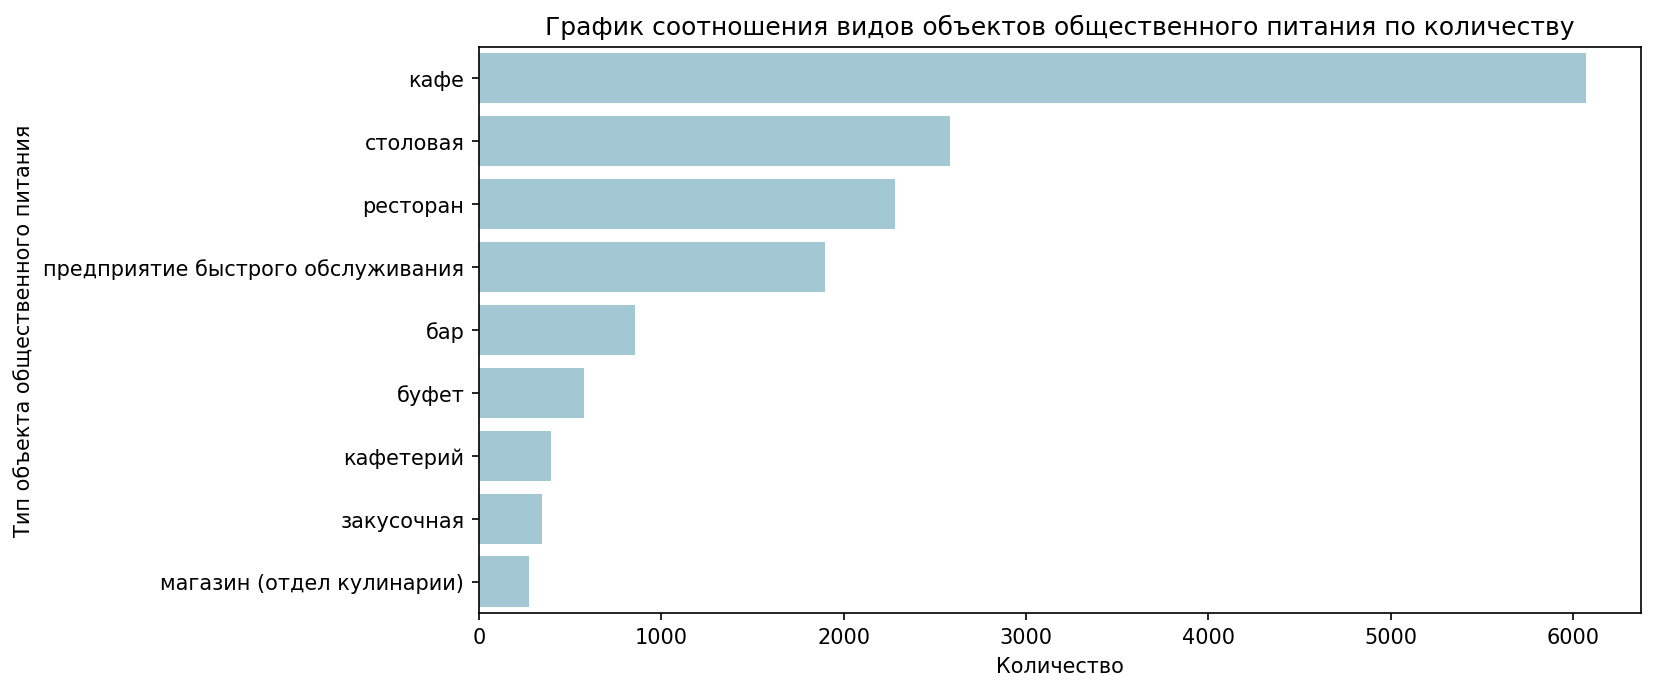

In [292]:
plt.figure(figsize=(10, 5), dpi=150)
sns.barplot(x='Количество', y='Тип объекта общественного питания', data=object_type_df, color='#99ccdd')
plt.title('График соотношения видов объектов общественного питания по количеству')
plt.show()

Самый распространенный тип заведений - кафе (39% от общего количества объектов), далее группа из 3-х видов - столовые, рестораны и предприятия быстрого обслуживания (в диапазоне от 12 до почти 17%). И третья группа - бары, буфеты, кафетерии, закусочные и отделы кулинарии (примерно от 2 до 6% на каждый вид). 

Посмотрим принадлежность заведений к сетям. 

In [293]:
chain_type_df = (
    data.groupby('chain', as_index=False)
    .agg({'id': 'count'})
    .sort_values(by='id', ascending=False)
)
chain_type_df.columns = ['Принадлежность к сети', 'Количество']
chain_type_df['ratio'] = (chain_type_df['Количество'] / chain_type_df['Количество'].sum())*100
chain_type_df

,Принадлежность к сети,Количество,ratio
0,False,12317,80.603364
1,True,2964,19.396636


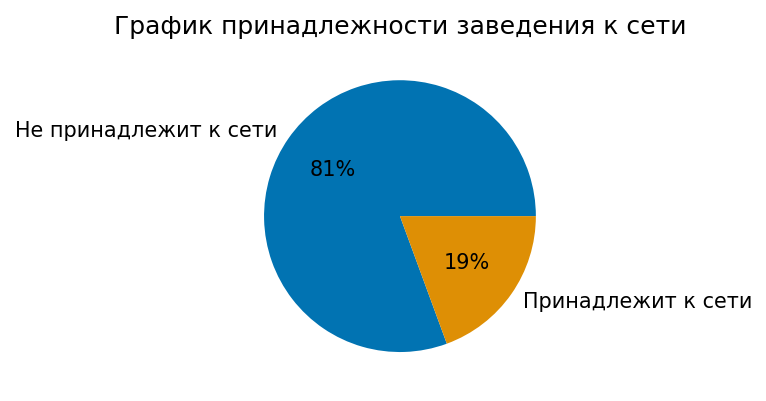

In [294]:
plt.figure(figsize=(8, 3), dpi=150)
sns.set_palette('colorblind') 
keys = ['Не принадлежит к сети', 'Принадлежит к сети']
plt.pie(x='Количество', labels=keys, data=chain_type_df, autopct='%.0f%%')
plt.title('График принадлежности заведения к сети')
plt.show()

К сетевым отноcится только 19,3% от общего числа заведений. Остальные точки общепита - не сетевые.

Посмотрим принадленжность с сетям разных видов бъектов общественного питания Москвы.

In [295]:
chain_object_df = (
    data.groupby(['object_type', 'chain'], as_index=False)
    .agg({'id': 'count'})
    .sort_values(by='object_type', ascending=False)
)
chain_object_df.columns = ['Тип объекта общественного питания', 'Принадлежность к сети', 'Количество']
chain_object_df.head(5)

,Тип объекта общественного питания,Принадлежность к сети,Количество
17,столовая,True,3
16,столовая,False,2581
15,ресторан,True,543
14,ресторан,False,1739
13,предприятие быстрого обслуживания,True,788


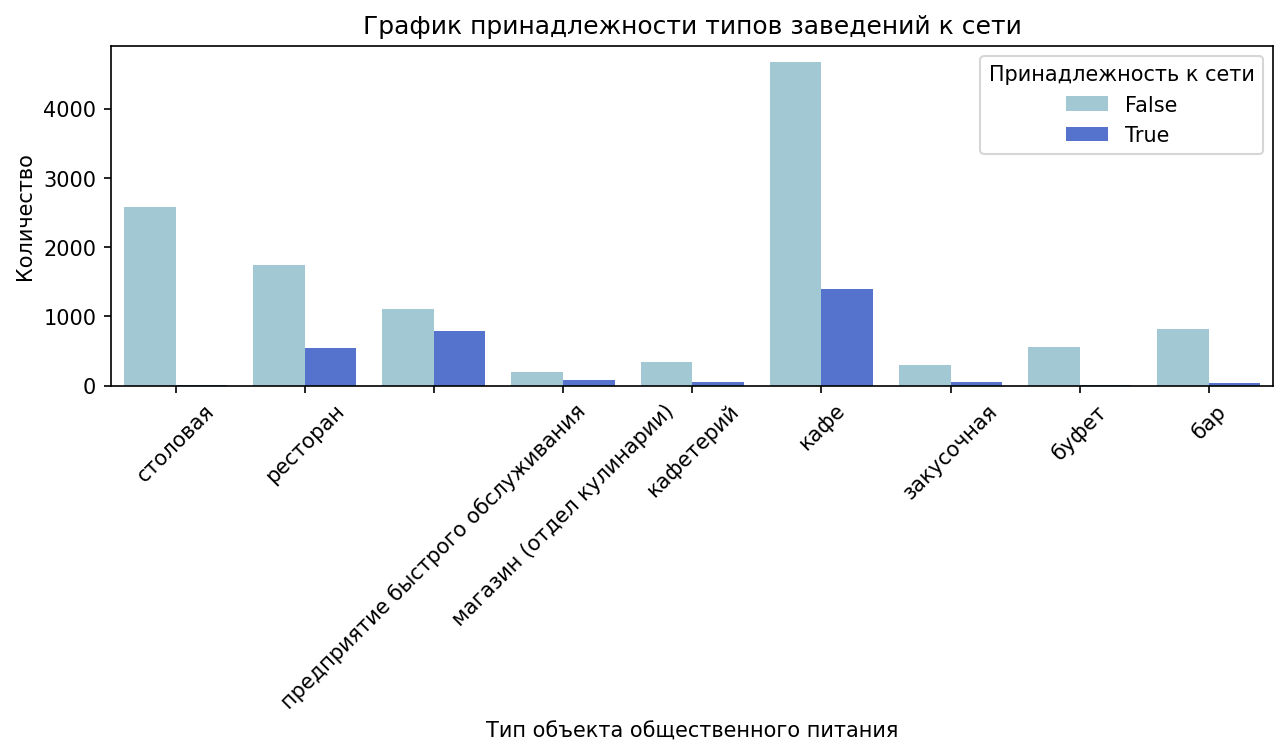

In [296]:
plt.figure(figsize=(10, 3), dpi=150)
sns.set_palette('colorblind')
sns.barplot(
    x='Тип объекта общественного питания', 
    y='Количество', 
    hue='Принадлежность к сети', 
    data=chain_object_df,
    palette=sns.color_palette(['#99ccdd','royalblue'])
)
plt.title('График принадлежности типов заведений к сети')
plt.xticks(rotation=45)
plt.show()




In [297]:
chain_object_df_2 = (data.query('chain == True')
    .groupby(['object_type'], as_index=False)
    .agg({'id': 'count'})
)

In [298]:
chain_object_df_3 = (data.query('chain == False')
    .groupby(['object_type'], as_index=False)
    .agg({'id': 'count'})
)

In [299]:
chain_object_df_2 = chain_object_df_2.merge(chain_object_df_3, on='object_type', how='left')
chain_object_df_2['Доля сетевых заведений'] = (chain_object_df_2['id_x'] / (chain_object_df_2['id_x'] + chain_object_df_2['id_y']))*100
chain_object_df_2.columns = ['Тип объекта общественного питания', 'Принадлежит к сети', 'Не принадлежит к сети', 'Доля сетевых заведений']

chain_object_df_2.sort_values(by='Доля сетевых заведений', ascending=False)

,Тип объекта общественного питания,Принадлежит к сети,Не принадлежит к сети,Доля сетевых заведений
6,предприятие быстрого обслуживания,788,1109,41.539273
5,магазин (отдел кулинарии),78,195,28.571429
7,ресторан,543,1739,23.794917
3,кафе,1396,4675,22.994564
2,закусочная,56,292,16.091954
4,кафетерий,52,343,13.164557
0,бар,37,818,4.327485
1,буфет,11,565,1.909722
8,столовая,3,2581,0.116099


В первую очередь в сетевом виде развивается такой вид общепита, как предприятия быстрого обслуживания (что объяснимо с т.зр. сложности технологической цепочки и логистики), здесь максимальная доля сетевых заведений по сравнению со остальными видами. Далее схожие друг с другом по соотношению сети/не сети - магазины с отделами кулинарии, рестораны и кафе. В абсолютных цифрах по количеству сетевых заведений лидирует тип "кафе". 

Изучим количество заведений у каждого типа сетевых точек общепита, а также среднее количество посадочных мест в сетевых заведениях.

In [300]:
data_chain = data.query('chain == True')

In [301]:
data_chain_tables = data_chain.pivot_table(index='object_type', values='id', aggfunc='count')
data_chain_tables['tables'] = data_chain.pivot_table(index='object_type', values='number', aggfunc='sum')
data_chain_tables = data_chain_tables.reset_index().sort_values(by='id', ascending=False)
data_chain_tables['ratio_tables'] = data_chain_tables['tables'] / data_chain_tables['id']
data_chain_tables.columns = ['Тип объекта общественного питания', 'Количество заведений', 'Количество посадочных мест', 'Соотношение посадочных мест к количеству заведений']
data_chain_tables


,Тип объекта общественного питания,Количество заведений,Количество посадочных мест,Соотношение посадочных мест к количеству заведений
3,кафе,1396,66208,47.426934
6,предприятие быстрого обслуживания,788,31772,40.319797
7,ресторан,543,54497,100.362799
5,магазин (отдел кулинарии),78,677,8.679487
2,закусочная,56,805,14.375000
4,кафетерий,52,638,12.269231
0,бар,37,1962,53.027027
1,буфет,11,140,12.727273
8,столовая,3,337,112.333333


In [302]:
data_chain_research = data_chain.pivot_table(index='object_name', values='id', aggfunc='count')
data_chain_research['tables'] = data_chain.pivot_table(index='object_name', values='number', aggfunc='sum')
data_chain_research = data_chain_research.reset_index().sort_values(by='id', ascending=False)
data_chain_research.columns = ['object_name', 'objects', 'tables']
data_chain_research['tables_mean'] = data_chain_research['tables'] / data_chain_research['objects']

In [303]:
data_chain_research

,object_name,objects,tables,tables_mean
563,Шоколадница,157,8978,57.184713
25,Kfc,155,8578,55.341935
331,Макдоналдс,150,13155,87.700000
110,Бургер Кинг,137,6391,46.649635
521,Теремок,94,2407,25.606383
...,...,...,...,...
343,Мираторг,1,12,12.000000
342,Мимино Хинкальная,1,70,70.000000
148,Дабл Би Блэк,1,40,40.000000
152,Детский Клуб «Андерсон»,1,41,41.000000


In [304]:
data_chain_research = data_chain_research.query('objects != 1')
data_chain_research

,object_name,objects,tables,tables_mean
563,Шоколадница,157,8978,57.184713
25,Kfc,155,8578,55.341935
331,Макдоналдс,150,13155,87.700000
110,Бургер Кинг,137,6391,46.649635
521,Теремок,94,2407,25.606383
...,...,...,...,...
203,Кафе «Prime» Прайм Стар,2,52,26.000000
94,Барбекю,2,45,22.500000
97,Бенто Wok,2,36,18.000000
211,Кафе «Данкин Донатс»,2,55,27.500000


In [305]:
print(np.quantile(data_chain_research['objects'], q = [0.33, 0.66]))
print(np.quantile(data_chain_research['tables_mean'], q = [0.33, 0.66]))

[3. 6.]
[26.    67.744]


In [306]:
few_ob = 3
lot_ob = 6
few_tab = 26
lot_tab = 67

In [307]:
def objects_category(data_chain_research):
    objects = data_chain_research['objects']
    if objects <= few_ob:
        return 'Мало заведений'
    if objects >= lot_ob:
        return 'Много заведений'
    return 'Среднее количество'

data_chain_research['objects_category'] = data_chain_research.apply(objects_category, axis=1)

C:\Users\dsaulin\AppData\Local\Temp/ipykernel_8336/4061517007.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chain_research['objects_category'] = data_chain_research.apply(objects_category, axis=1)


In [308]:
def table_category(data_chain_research):
    tables = data_chain_research['tables_mean']
    if tables <= few_tab:
        return 'Мало мест'
    if tables >= lot_tab:
        return 'Много мест'
    return 'Среднее количество'

data_chain_research['tables_category'] = data_chain_research.apply(table_category, axis=1)

C:\Users\dsaulin\AppData\Local\Temp/ipykernel_8336/4274712454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chain_research['tables_category'] = data_chain_research.apply(table_category, axis=1)


In [309]:
data_chain_research

,object_name,objects,tables,tables_mean,objects_category,tables_category
563,Шоколадница,157,8978,57.184713,Много заведений,Среднее количество
25,Kfc,155,8578,55.341935,Много заведений,Среднее количество
331,Макдоналдс,150,13155,87.700000,Много заведений,Много мест
110,Бургер Кинг,137,6391,46.649635,Много заведений,Среднее количество
521,Теремок,94,2407,25.606383,Много заведений,Мало мест
...,...,...,...,...,...,...
203,Кафе «Prime» Прайм Стар,2,52,26.000000,Мало заведений,Мало мест
94,Барбекю,2,45,22.500000,Мало заведений,Мало мест
97,Бенто Wok,2,36,18.000000,Мало заведений,Мало мест
211,Кафе «Данкин Донатс»,2,55,27.500000,Мало заведений,Среднее количество


In [310]:
data_chain_category = data_chain_research \
.query('tables_category == "Много мест"') \
.pivot_table(
    index='objects_category', 
    values='tables_category', 
    aggfunc='count'
)

data_chain_category['Мало мест'] = data_chain_research \
.query('tables_category == "Мало мест"') \
.pivot_table(
    index='objects_category', 
    values='tables_category', 
    aggfunc='count'
)

data_chain_category['Среднее количество мест'] = data_chain_research \
.query('tables_category == "Среднее количество"') \
.pivot_table(
    index='objects_category', 
    values='tables_category', 
    aggfunc='count'
)

data_chain_category = data_chain_category.reset_index()

data_chain_category.columns = ['Количество заведений', 'Много мест', 'Мало мест', 'Среднее количество мест']

In [311]:
data_chain_category

,Количество заведений,Много мест,Мало мест,Среднее количество мест
0,Мало заведений,46,43,34
1,Много заведений,29,31,32
2,Среднее количество,11,9,12


В результате **18,6%** "неодиночных" сетей - с **малым** количеством заведений и **большим** количеством мест.

17,4% - с малым количеством заведений и мест.

12,5% - с большим количеством заведений и малым количеством мест. И 11,7% - много заведений и мест.



Изучим средние количества посадочных мест для всех видов объектов.

In [312]:
data_object_mean = data.pivot_table(index='object_type', values='id', aggfunc='count')
data_object_mean['ratio_tables'] = data.pivot_table(index='object_type', values='number', aggfunc='mean')
data_object_mean = data_object_mean.reset_index()
data_object_mean.columns = ['Тип объекта общественного питания', 'Количество заведений', 'Среднее количество посадочных мест']
data_object_mean = data_object_mean.sort_values(by='Среднее количество посадочных мест', ascending=False)
data_object_mean

,Тип объекта общественного питания,Количество заведений,Среднее количество посадочных мест
8,столовая,2584,130.337848
7,ресторан,2282,96.884750
1,буфет,576,51.425347
0,бар,855,43.533333
3,кафе,6071,39.785703
6,предприятие быстрого обслуживания,1897,20.808645
4,кафетерий,395,9.184810
2,закусочная,348,7.847701
5,магазин (отдел кулинарии),273,5.589744


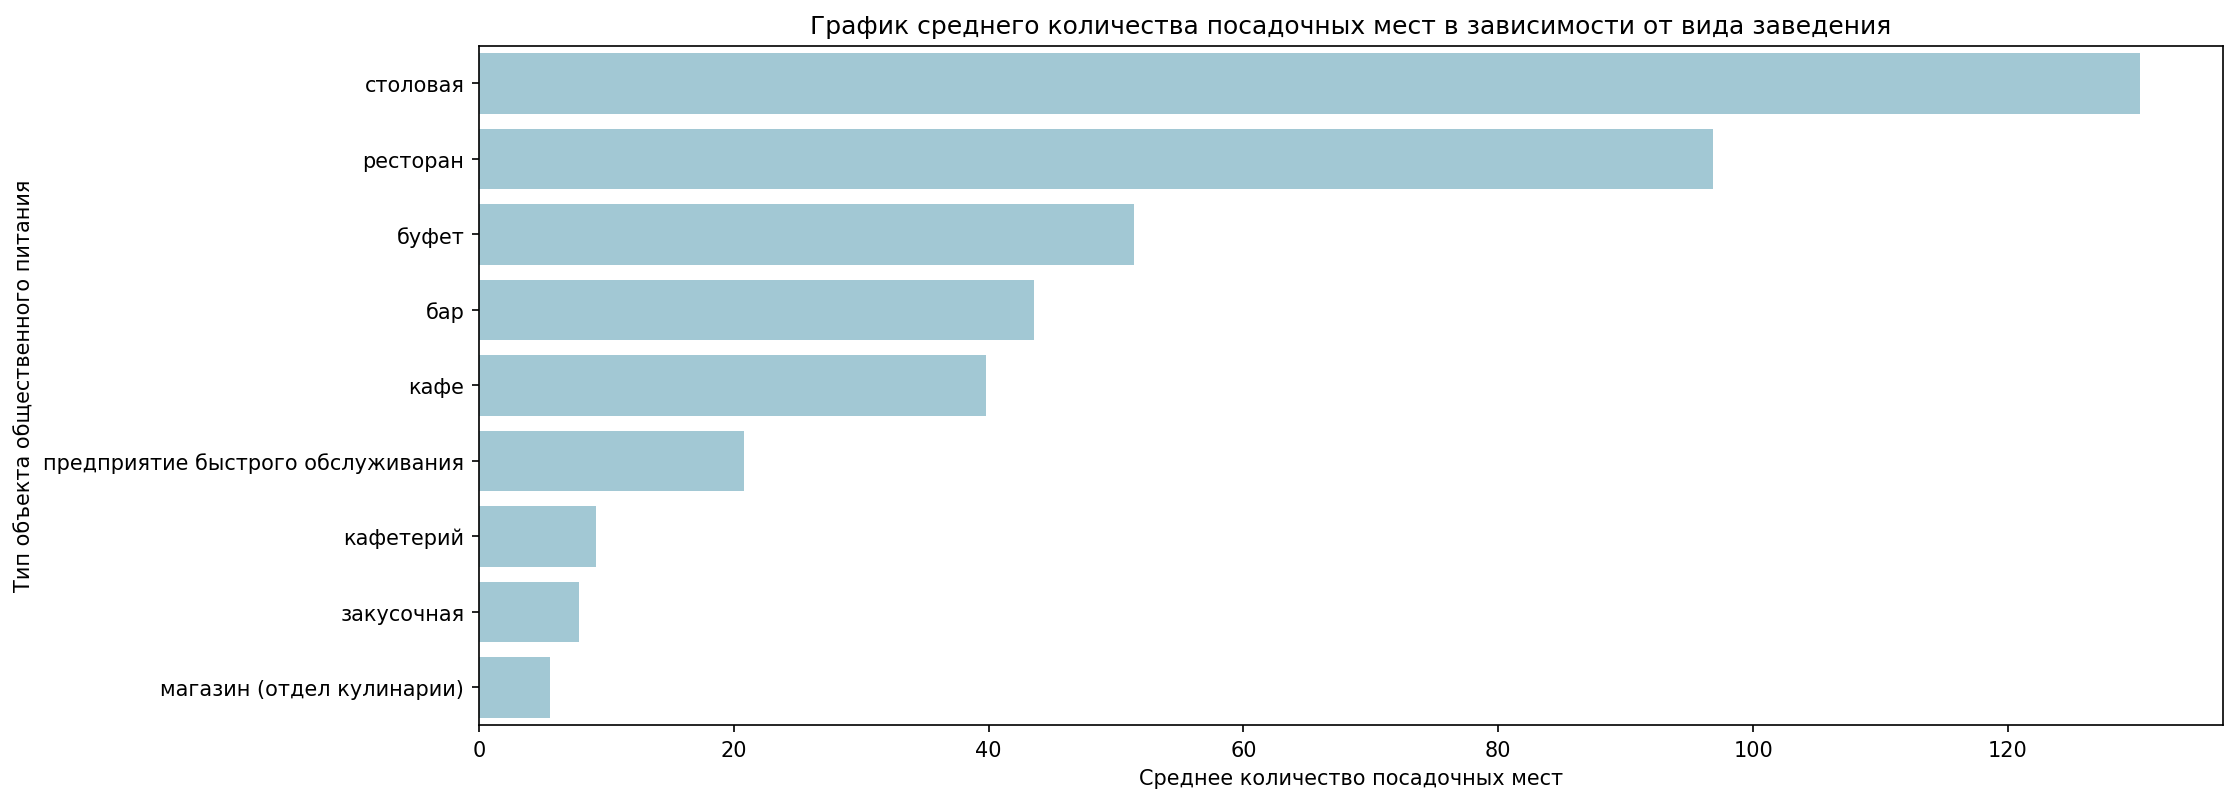

In [313]:
plt.figure(figsize=(15,6), dpi=150)
sns.barplot(x='Среднее количество посадочных мест', y='Тип объекта общественного питания', data=data_object_mean, color='#99ccdd')
plt.title('График среднего количества посадочных мест в зависимости от вида заведения')
plt.show()

Как и в случае с сетевыми заведениями, общая статистика говорит, что столовые на первом месте по среднему количеству посадочных мест на точку. Также схожим с предыдущими подсчетами образом лидируют рестораны и бары. И в отличие от сетей в общей группе много посадочных мест у буфетов. 

Изучим географические особенности распределения точек общепита в Москве. 

Выделим в обоих датасетах названия улиц в отдельный столбец

In [314]:
data['street'] = data['address'].str.lower()
data['street'] = data['street'].str.split(", ")
data['street'] = data['street'].str.get(1)

In [315]:
data.head(5)

,id,object_name,chain,object_type,address,number,street
0,0,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова
1,1,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина
2,2,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица
3,3,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица
4,4,Кафе «Вишневая Метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [316]:
data_moscow['street'] = data_moscow['address'].str.lower()
data_moscow['street'] = data_moscow['street'].str.split(", ")
data_moscow['street'] = data_moscow['street'].str.get(1)

In [317]:
data_moscow.head(5)

,id,name,global_id,is_net_object,operating_company,type_object,adm_area,district,address,public_phone,seats_count,social_privileges,longitude_WGS84,latitude_WGS84,geodata_center,geoarea,street
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea,NaN
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN,улица егора абакумова
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN,улица талалихина
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN,город москва
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN,угличская улица


Составим справочник московских улиц и районов

In [318]:
data_moscow_district = data_moscow[['address', 'district']]
data_moscow_district

,address,district
0,Адрес,Район
1,"город Москва, улица Егора Абакумова, дом 9",Ярославский район
2,"город Москва, улица Талалихина, дом 2/1, корпус 1",Таганский район
3,"Российская Федерация, город Москва, внутригоро...",Таганский район
4,"город Москва, Угличская улица, дом 17",район Лианозово
...,...,...
19728,"Российская Федерация, город Москва, внутригоро...",Алексеевский район
19729,"Российская Федерация, город Москва, внутригоро...",Алексеевский район
19730,"город Москва, Русаковская улица, дом 31",район Сокольники
19731,"Российская Федерация, город Москва, внутригоро...",Тверской район


In [319]:
data_moscow_district = data_moscow_district.drop_duplicates().reset_index(drop=True)
data_moscow_district = data_moscow_district.sort_values(by='address', ascending=True)
data_moscow_district = data_moscow_district.dropna()
data_moscow_district

,address,district
4217,"1-й Красногвардейский проезд, дом 15, помещени...",Пресненский район
869,"1-й Нагатинский проезд, дом 14, машино-место 120",район Нагатино-Садовники
2701,"17-й проезд Марьиной Рощи, дом 4, машино-место...",район Марьина Роща
10819,"2-й Грайвороновский проезд, дом 44, корпус 2",Рязанский район
5731,"2-я Тверская-Ямская улица, дом 40/3, строение 1",Тверской район
...,...,...
9336,"улица Расплетина, дом 1, квартира 38, комната 1",район Щукино
10562,"улица Рождественка, дом 6/9/20, строение 11",Мещанский район
10965,"улица Свободы, дом 48, строение 1",район Южное Тушино
5725,"улица Солянка, дом 1/2, строение 1, помещение ...",Басманный район


In [320]:
data = data.merge(data_moscow_district, on='address', how='left')

In [321]:
data = data.dropna()

In [322]:
data.head()

,id,object_name,chain,object_type,address,number,street,district
0,0,Сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова,Ярославский район
1,1,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Таганский район
3,3,Пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица,район Лианозово
6,6,Брусника,True,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок сивцев вражек,район Арбат
7,7,Буфет Мтуси,False,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,авиамоторная улица,район Лефортово


Составим топ-10 улиц Москвы по количеству заведений общепита, исключив при этом из топа районы пригородов.

In [323]:
data_top_10 = (data.query('street != "город зеленоград" and street != "поселение сосенское"')
               .groupby('street')['id', 'number', 'district']
               .agg({'id':'count', 'number':'sum', 'district': set})
               .sort_values(by='id', ascending=False)
               .reset_index()
               .head(10)
)
data_top_10.columns = ['Улица Москвы', 'Количество заведений', 'Количество посадочных мест', 'Список районов']



data_top_10

# 'district':list

C:\Users\dsaulin\AppData\Local\Temp/ipykernel_8336/2553567963.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_top_10 = (data.query('street != "город зеленоград" and street != "поселение сосенское"')


,Улица Москвы,Количество заведений,Количество посадочных мест,Список районов
0,проспект мира,173,11715,"{Алексеевский район, район Ростокино, Мещански..."
1,профсоюзная улица,143,7337,"{район Ясенево, район Тёплый Стан, Обручевский..."
2,кутузовский проспект,142,10415,"{район Фили-Давыдково, поселение Краснопахорск..."
3,ленинградский проспект,139,7169,"{район Беговой, район Сокол, Хорошёвский район..."
4,пресненская набережная,135,6678,{Пресненский район}
5,варшавское шоссе,120,6043,"{Нагорный район, район Чертаново Северное, рай..."
6,ленинский проспект,116,7560,"{район Проспект Вернадского, Гагаринский район..."
7,проспект вернадского,103,6045,"{район Проспект Вернадского, Ломоносовский рай..."
8,кировоградская улица,102,5525,"{район Чертаново Северное, район Чертаново Цен..."
9,ходынский бульвар,99,1663,{Хорошёвский район}


In [324]:
data_top_10['tables_ratio'] = data_top_10['Количество посадочных мест'] / data_top_10['Количество заведений']
data_top_10.columns = ['Улица Москвы', 'Количество заведений', 'Количество посадочных мест', 'Список районов', 'Среднее количество посадочных мест']
data_top_10

,Улица Москвы,Количество заведений,Количество посадочных мест,Список районов,Среднее количество посадочных мест
0,проспект мира,173,11715,"{Алексеевский район, район Ростокино, Мещански...",67.716763
1,профсоюзная улица,143,7337,"{район Ясенево, район Тёплый Стан, Обручевский...",51.307692
2,кутузовский проспект,142,10415,"{район Фили-Давыдково, поселение Краснопахорск...",73.345070
3,ленинградский проспект,139,7169,"{район Беговой, район Сокол, Хорошёвский район...",51.575540
4,пресненская набережная,135,6678,{Пресненский район},49.466667
5,варшавское шоссе,120,6043,"{Нагорный район, район Чертаново Северное, рай...",50.358333
6,ленинский проспект,116,7560,"{район Проспект Вернадского, Гагаринский район...",65.172414
7,проспект вернадского,103,6045,"{район Проспект Вернадского, Ломоносовский рай...",58.689320
8,кировоградская улица,102,5525,"{район Чертаново Северное, район Чертаново Цен...",54.166667
9,ходынский бульвар,99,1663,{Хорошёвский район},16.797980


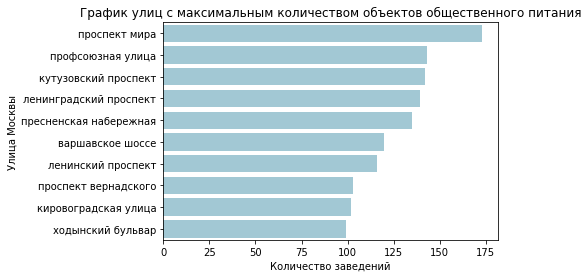

In [325]:
sns.barplot(x='Количество заведений', y='Улица Москвы', data=data_top_10, color='#99ccdd')
plt.title('График улиц с максимальным количеством объектов общественного питания')
plt.show()

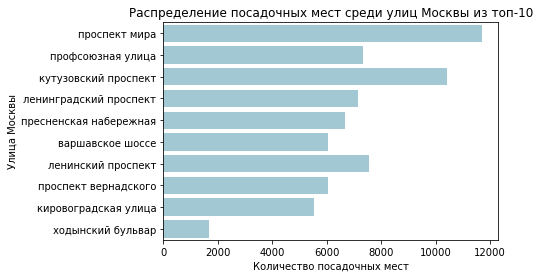

In [326]:
sns.barplot(x='Количество посадочных мест', y='Улица Москвы', data=data_top_10, color='#99ccdd')
plt.title('Распределение посадочных мест среди улиц Москвы из топ-10')
plt.show()

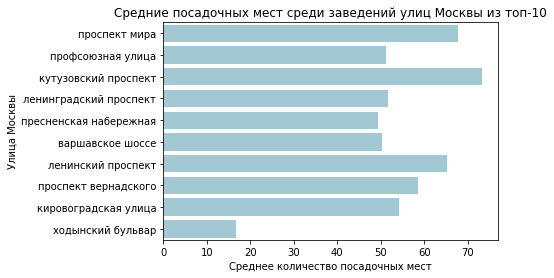

In [327]:
sns.barplot(x='Среднее количество посадочных мест', y='Улица Москвы', data=data_top_10, color='#99ccdd')
plt.title('Средние посадочных мест среди заведений улиц Москвы из топ-10')
plt.show()

В топ-10 попали самые магистрали столицы, некоторые из которых проходят через несколько районов. Отметим, по количеству посадочных мест лидирует улица с максимальным количеством заведений - Проспект Мира. Также по количеству посадочных мест выделяются Ленинский проспект и Кутузовский, и они же в компании Проспекта Вернадского лидируют по среднему количеству посадочных мест. Т.е крупные заведения концентрируются в районах и на улицах, не всегда совпадающих с рекордсменами по общему количеству заведений.

In [328]:
data_streets_districts = (data.groupby('street')['id', 'district']
               .agg({'id':'count', 'district':'nunique'})
               .query('district == 1 and street != "поселение сосенское"')
               .sort_values(by='id', ascending=False)
               .reset_index()
               .head(10)
)

data_streets_districts.columns = ['Улица Москвы', 'Количество заведений', 'Количество районов']
data_streets_districts

C:\Users\dsaulin\AppData\Local\Temp/ipykernel_8336/3345048928.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_streets_districts = (data.groupby('street')['id', 'district']


,Улица Москвы,Количество заведений,Количество районов
0,пресненская набережная,135,1
1,ходынский бульвар,99,1
2,улица новый арбат,87,1
3,улица ленинская слобода,77,1
4,улица покровка,70,1
5,пятницкая улица,64,1
6,улица арбат,60,1
7,ярцевская улица,58,1
8,улица маросейка,57,1
9,хорошёвское шоссе,54,1


Можно обратить внимание на топ-10 улиц, которые размещены только в рамках одно района. Скорее всего конкуренция по этим адресам будем особенно высока, равно как и стоимость аренды.

Составим список улиц и проспектов, где мы смогли найти только одно заведение, а также изучим, в каких районах их можно найти.

In [329]:
data_one_street = (data.groupby('street')['district', 'id']
               .agg({'id':'count', 'district':set})
               .query('id == 1')
               .reset_index()
)
data_one_street

C:\Users\dsaulin\AppData\Local\Temp/ipykernel_8336/462483128.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_one_street = (data.groupby('street')['district', 'id']


,street,id,district
0,1-й балтийский переулок,1,{район Аэропорт}
1,1-й басманный переулок,1,{Красносельский район}
2,1-й ботанический проезд,1,{район Свиблово}
3,1-й голутвинский переулок,1,{район Якиманка}
4,1-й котельнический переулок,1,{Таганский район}
...,...,...,...
516,штурвальная улица,1,{район Южное Тушино}
517,электрический переулок,1,{Пресненский район}
518,якиманский переулок,1,{район Якиманка}
519,янтарный проезд,1,{Лосиноостровский район}


In [330]:
data_one_street_sum = data_one_street['district'].value_counts()

data_one_street_sum = pd.DataFrame(data_one_street_sum)

data_one_street_sum.head(20)

,district
{Таганский район},26
{Басманный район},25
{район Хамовники},24
{Пресненский район},20
{Тверской район},17
{район Сокольники},15
{Мещанский район},11
{Можайский район},11
{район Аэропорт},10
{Красносельский район},10


Можно обратить внимание на несколько районов, где есть десятки улиц с минимальным количеством точек общепита - Таганский, Басманный районы, Хамовники и т.д. Общее количество таких улиц - 521, а районов - 113. Часть из них находится в центре (и от малого количества точек общепита точно не страдают), скорее всего дело в наличии переулков. Если говорить о нецентральных районах, то адреса могут быть близкими к промзонам и предприятиям.

## Общие выводы

- Самый распространенный тип заведений - кафе, далее группа из 3-х видов - столовые, рестораны и предприятия быстрого обслуживания. 
- К сетевым отноcится только 19,3% от общего числа заведений. В сетевом виде развиваются предприятия быстрого обслуживания, магазины с отделами кулинарии, рестораны и кафе. В абсолютных цифрах по количеству сетевых заведений лидирует тип "кафе". 
- Для сетевых заведений в общем характерно малое количество заведений (менее или равно 3-м заведениям в сети) с большим количеством мест (от 67 мест и более на одно заведение). На втором месте - небольшие заведения с 26 и меньшим количеством мест на точку. 
- Общая статистика говорит, что столовые на первом месте по среднему количеству посадочных мест на точку. Также лидируют рестораны и бары. И в отличие от сетей в общей группе много посадочных мест у буфетов. 
- В топ-10 улиц по количеству точек попали магистрали столицы, некоторые из которых проходят через несколько районов. Отметим, по количеству посадочных мест лидирует улица с максимальным количеством заведений - Проспект Мира. Также по количеству посадочных мест выделяются Ленинский проспект и Кутузовский, и они же в компании Проспекта Вернадского лидируют по среднему количеству посадочных мест. Т.е крупные заведения концентрируются в районах и на улицах, не всегда совпадающих с рекордсменами по общему количеству заведений. 
- Можно обратить внимание на несколько районов, где есть десятки улиц с минимальным количеством точек общепита - Таганский, Басманный районы, Хамовники и т.д. Общее количество таких улиц - 521, а районов - 113. Также мы составили топ-10, где улицы располагаются в рамках одного района каждая. Развитие в таких микрорайонах дело искованное из-за конкуренции и высокой цены аренды.

## Рекомендации

- Поскольку проект дорогостоящий и долгосрочный, первая рекомендация - создавать сетевое заведение. С одной стороны конкуренция не очень высока в силу небольшого количества сетей (247 сетей с количеством заведений более двух, из них крупных - 92), с другой - расходы на создание и продвижение точки сети будут ниже, чем в случае одиночных заведений, а значит можно развивать бОльшее количество точек (что и демонстрируют некоторые сети);
- В сетях успешно развиваются такие типы объектов, как кафе, бары и рестораны, для них характерны либо небольшое количество заведений с большим количеством посадочных мест;
- Другая тенденция - крупные и/или многочисленные сети с такими типа объектов, как предприятие быстрого обслуживания (фастфуд) и столовые. Здесь интересно то, что такие объекты не всегда концентрируются в центральных или модных районах, а разбросаны по всему городу. Роботизированное обслуживание в таких заведениях также будет работать на идею конвеерного сервиса;
- Если говорить о географическом расположении, то 10 самых насыщенных общепитом мест - крупные улицы и проспекты, пролегающие через несколько районов Москвы. При этом в некоторых случаях крупные по размеру заведения располагаются не всегда в первой пятерке улиц (лидер по большим заведениям - Кутузовский проспект.)
- Другая идея для роста - выбор районов, где есть десятки улиц с 1 заведением на магистрали: Таганский район, Басманный район, район Хамовники, Тверской район и т.д. Понятно, что малая концентрация точек общепита может быть связана с факторами, которые препятствуют успеху, но дополнительный анализ может помочь найти новые места для открытия проекта. 

Презентация: <https://disk.yandex.ru/i/EU9onUOxd4KTIg> 